In [1]:
from tarfile import data_filter

import pandas as pd

In [8]:
import pandas as pd
pd.__version__

'2.3.3'

In [7]:
from sqlalchemy import create_engine
import pandas as pd
engine = create_engine('postgresql+psycopg://postgres@localhost:5432/restaurant')

df = pd.read_sql('SELECT * FROM public.sales_july ORDER BY sale_date, region, branch_name',
engine
)

df.head()


,sale_date,branch_name,region,sales
0,2025-07-01,Birmingham Central,Midlands,1200
1,2025-07-01,Birmingham Central,Midlands,1200
2,2025-07-01,Leeds City,North,1800
3,2025-07-01,Leeds City,North,1800
4,2025-07-01,Manchester Piccadilly,North,1400


In [1]:
from sqlalchemy import create_engine, text

engine = create_engine('postgresql+psycopg://postgres@localhost:5432/restaurant')

with engine.connect() as conn:
    print(conn.execute(text('SELECT 1')).fetchone())


(1,)


In [2]:
import pandas as pd

query = '''
SELECT sale_date, branch_name, region, sales
FROM public.sales_july
ORDER BY sale_date, region, branch_name;'''

df = pd.read_sql(query, engine)
df.head(10)

,sale_date,branch_name,region,sales
0,2025-07-01,Birmingham Central,Midlands,1200
1,2025-07-01,Birmingham Central,Midlands,1200
2,2025-07-01,Leeds City,North,1800
3,2025-07-01,Leeds City,North,1800
4,2025-07-01,Manchester Piccadilly,North,1400
5,2025-07-01,Bristol Harbourside,South,1700
6,2025-07-01,London Stratford,South,2100
7,2025-07-01,London Stratford,South,2100
8,2025-07-02,Birmingham Central,Midlands,1350
9,2025-07-02,Leeds City,North,1750


In [3]:
print("rows, cols:", df.shape)
print(df.dtypes)

region_sales = df.groupby("region", as_index=False)["sales"].sum().sort_values("sales", ascending=False)
region_sales

rows, cols: (18, 4)
sale_date      object
branch_name    object
region         object
sales           int64
dtype: object


,region,sales
2,South,13550
1,North,11400
0,Midlands,4850


In [4]:
import pandas as pd

print('shape:', df.shape)
display(df.head())

df['sale_date'] = pd.to_datetime(df['sale_date'])

print(df.dtypes)

shape: (18, 4)


,sale_date,branch_name,region,sales
0,2025-07-01,Birmingham Central,Midlands,1200
1,2025-07-01,Birmingham Central,Midlands,1200
2,2025-07-01,Leeds City,North,1800
3,2025-07-01,Leeds City,North,1800
4,2025-07-01,Manchester Piccadilly,North,1400


sale_date      datetime64[ns]
branch_name            object
region                 object
sales                   int64
dtype: object


In [5]:
import pandas as pd

df[['sale_date', 'region', 'sales']]

,sale_date,region,sales
0,2025-07-01,Midlands,1200
1,2025-07-01,Midlands,1200
2,2025-07-01,North,1800
3,2025-07-01,North,1800
4,2025-07-01,North,1400
5,2025-07-01,South,1700
6,2025-07-01,South,2100
7,2025-07-01,South,2100
8,2025-07-02,Midlands,1350
9,2025-07-02,North,1750


In [6]:
df[['sale_date','branch_name', 'region', 'sales']]

,sale_date,branch_name,region,sales
0,2025-07-01,Birmingham Central,Midlands,1200
1,2025-07-01,Birmingham Central,Midlands,1200
2,2025-07-01,Leeds City,North,1800
3,2025-07-01,Leeds City,North,1800
4,2025-07-01,Manchester Piccadilly,North,1400
5,2025-07-01,Bristol Harbourside,South,1700
6,2025-07-01,London Stratford,South,2100
7,2025-07-01,London Stratford,South,2100
8,2025-07-02,Birmingham Central,Midlands,1350
9,2025-07-02,Leeds City,North,1750


In [7]:
df[df['region'] == 'North']

,sale_date,branch_name,region,sales
2,2025-07-01,Leeds City,North,1800
3,2025-07-01,Leeds City,North,1800
4,2025-07-01,Manchester Piccadilly,North,1400
9,2025-07-02,Leeds City,North,1750
10,2025-07-02,Manchester Piccadilly,North,1550
14,2025-07-03,Leeds City,North,1600
15,2025-07-03,Manchester Piccadilly,North,1500


In [8]:
df[df['region'] == 'South','North']

InvalidIndexError: (0     False
1     False
2     False
3     False
4     False
5      True
6      True
7      True
8     False
9     False
10    False
11     True
12     True
13    False
14    False
15    False
16     True
17     True
Name: region, dtype: bool, 'North')

In [9]:
df.sort_values("sales", ascending=False)

,sale_date,branch_name,region,sales
17,2025-07-03,London Stratford,South,2200
7,2025-07-01,London Stratford,South,2100
6,2025-07-01,London Stratford,South,2100
12,2025-07-02,London Stratford,South,1950
16,2025-07-03,Bristol Harbourside,South,1850
2,2025-07-01,Leeds City,North,1800
3,2025-07-01,Leeds City,North,1800
9,2025-07-02,Leeds City,North,1750
5,2025-07-01,Bristol Harbourside,South,1700
11,2025-07-02,Bristol Harbourside,South,1650


In [10]:
df.groupby("region")["sales"].sum()

region
Midlands     4850
North       11400
South       13550
Name: sales, dtype: int64

In [11]:
df.groupby("region")["sales"]

In [12]:
print("shape:", df.shape)

shape: (18, 4)


In [13]:
print("shape", df.shape)
print(df.shape)

shape (18, 4)
(18, 4)


In [14]:
df.shape

(18, 4)

In [15]:
north_df = df[df['region'] == 'North']
display(north_df)

,sale_date,branch_name,region,sales
2,2025-07-01,Leeds City,North,1800
3,2025-07-01,Leeds City,North,1800
4,2025-07-01,Manchester Piccadilly,North,1400
9,2025-07-02,Leeds City,North,1750
10,2025-07-02,Manchester Piccadilly,North,1550
14,2025-07-03,Leeds City,North,1600
15,2025-07-03,Manchester Piccadilly,North,1500


In [16]:
print('North rows:', north_df.shape)

North rows: (7, 4)


In [17]:
north_df = df[df["region"] == "North"]
display(north_df)
print("North rows:", north_df.shape)

,sale_date,branch_name,region,sales
2,2025-07-01,Leeds City,North,1800
3,2025-07-01,Leeds City,North,1800
4,2025-07-01,Manchester Piccadilly,North,1400
9,2025-07-02,Leeds City,North,1750
10,2025-07-02,Manchester Piccadilly,North,1550
14,2025-07-03,Leeds City,North,1600
15,2025-07-03,Manchester Piccadilly,North,1500


North rows: (7, 4)


In [18]:
region_sales = (
    df.groupby("region", as_index=False)["sales"]
      .sum()
      .sort_values("sales", ascending=False)
)

display(region_sales)

,region,sales
2,South,13550
1,North,11400
0,Midlands,4850


In [19]:
plt.figure()
plt.bar(region_sales['region'], region_sales['sales'])
plt.title('Total Sales by Region (July)')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

NameError: name 'plt' is not defined

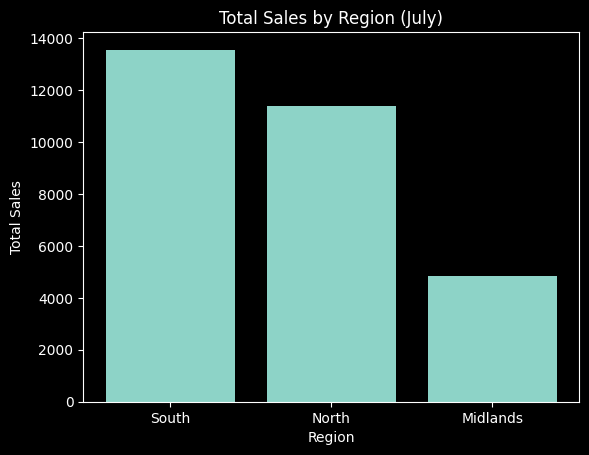

In [20]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(region_sales['region'], region_sales['sales'])
plt.title('Total Sales by Region (July)')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

In [36]:
branch_sales = (
    df.groupby("branch_name", as_index=False)["sales"]
    .sum()
    .sort_values('sales', ascending=True)
)
display(branch_sales.head(18))

,branch_name,sales
4,Manchester Piccadilly,4450
0,Birmingham Central,4850
1,Bristol Harbourside,5200
2,Leeds City,6950
3,London Stratford,8350


In [37]:
df.groupby("region")["sales"].sum()

region
Midlands     4850
North       11400
South       13550
Name: sales, dtype: int64

In [38]:
df.groupby("region", as_index=False)["sales"].sum()

,region,sales
0,Midlands,4850
1,North,11400
2,South,13550


In [41]:
branch_sales = (
  df.groupby("branch_name", as_index=False)["sales"].sum()
    .sort_values("sales", ascending=False)
)

display(branch_sales.head(3))

,branch_name,sales
3,London Stratford,8350
2,Leeds City,6950
1,Bristol Harbourside,5200


In [44]:
import pandas as pd

df = pd.read_csv("data/sales_july.csv")

df["sale_date"] = pd.to_datetime(df["sale_date"])

daily = (
    df.groupby(["sale_date", "region"], as_index=False)["sales"]
      .sum()
      .sort_values(["region", "sale_date"])
)

daily["prev_day_sales"] = daily.groupby("region")["sales"].shift(1)
daily["pct_change_day"] = ((daily["sales"] - daily["prev_day_sales"]) /daily["prev_day_sales"] * 100).round(2)
daily["running_total"] = daily.groupby("region")["sales"].cumsum()

daily

,sale_date,region,sales,prev_day_sales,pct_change_day,running_total
0,2025-07-01,Midlands,2400,NaN,NaN,2400
3,2025-07-02,Midlands,1350,2400.0,-43.75,3750
6,2025-07-03,Midlands,1100,1350.0,-18.52,4850
1,2025-07-01,North,5000,NaN,NaN,5000
4,2025-07-02,North,3300,5000.0,-34.00,8300
7,2025-07-03,North,3100,3300.0,-6.06,11400
2,2025-07-01,South,5900,NaN,NaN,5900
5,2025-07-02,South,3600,5900.0,-38.98,9500
8,2025-07-03,South,4050,3600.0,12.50,13550


In [45]:
daily.to_csv("data/kpi_daily_region_pandas.csv", index=False)

In [46]:
import os
os.listdir("data")

['sales_july.csv', 'kpi_daily_region_pandas.csv']

In [47]:
import os
print(os.path.abspath("data/kpi_daily_region_pandas.csv"))
print(os.getcwd())

/Users/xyz022000/PycharmProjects/restaurant_portfolio/data/kpi_daily_region_pandas.csv
/Users/xyz022000/PycharmProjects/restaurant_portfolio
